In [1]:
# Create a new conda environment with the following command:
# conda create -n bench python=3 pandas seaborn matplotlib numpy
# conda activate bench

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# problem_size,dims,kernel,tool,accel_size,accel_version,strategy,threads,board,REST OF PERF OUT,filename
# file_path='../results/results-tul-Fri_31_Mar_2023_03:26:42_PM_UTC.csv'
# file_path = '../results/results-latest.csv'
file_path = '../results/results-tul-2023_04_03-00:22:42-UTC-best_mr_copy.csv'

# read file into rows
rows = []
with open(file_path, 'r') as f:
    for line in f:
        rows.append(line.split(','))


df = pd.DataFrame.from_records(rows)
df.head()

# only keep columns from A to L
df = df.iloc[:, 0:12]

# drop column 10
df = df.drop(columns=[10])
df.head()


df.columns = ['problem_size', 'dims', 'kernel', 'tool', 'accel_size',
              'accel_version', 'strategy', 'threads', 'board', 'value', 'metric']
df.head()

# make accel_size an int
df['accel_size'] = df['accel_size'].astype(int)

# problem_size has a string of three values that are always the same
# split problem size and assign it to dims column
df['dims'] = df['problem_size'].str.split('_').str[0]
df['dims'] = df['dims'].astype(int)

# make value a float, using toNumeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# show the unique values in the accel_size, accel_version, and strategy columns
print(df['accel_size'].unique())
print(df['accel_version'].unique())
print(df['strategy'].unique())
print(df['tool'].unique())
print(df['board'].unique())
print(df['metric'].unique())

df.head()


[ 4  8 16  0]
['v2' 'v1' 'v3' 'NONE']
['As' 'Ns' 'Bs' 'Cs' 'NONE']
['mlir_ACC' 'cpp_MAN' 'mlir_CPU']
['tul_rel']
['branch-instructions' 'branch-misses' 'cache-references' 'cache-misses'
 'cpu-cycles' 'context-switches' 'page-faults' 'task-clock'
 'L1-dcache-load-misses' 'L1-dcache-loads' 'L1-dcache-stores'
 'L1-icache-load-misses' 'duration_time']


,problem_size,dims,kernel,tool,accel_size,accel_version,strategy,threads,board,value,metric
0,128_128_128,128,matmul_i32,mlir_ACC,4,v2,As,1,tul_rel,13547556.0,branch-instructions
1,128_128_128,128,matmul_i32,mlir_ACC,4,v2,As,1,tul_rel,1841700.0,branch-misses
2,128_128_128,128,matmul_i32,mlir_ACC,4,v2,As,1,tul_rel,62331926.0,cache-references
3,128_128_128,128,matmul_i32,mlir_ACC,4,v2,As,1,tul_rel,389680.0,cache-misses
4,128_128_128,128,matmul_i32,mlir_ACC,4,v2,As,1,tul_rel,273710346.0,cpu-cycles


# Filter the data based on dictionary and plot

In [3]:
# list all the columns
all_columns = ['problem_size', 'dims', 'kernel', 'tool', 'accel_size', 'accel_version',
               'strategy', 'threads', 'board', 'value', 'metric']

# Edit as needed
# Filtering a df with multiple values can be done like this:
# df[(df['metric'] == 'task-clock') & (df['strategy'] == 'Ns')]
filter_dict = {'metric': 'task-clock',
               'strategy': 'Ns'}
# filter_dict = {'metric': 'task-clock'}


def filter_df(df, filter_dict):
    """Filter the df based on dictionary key pairs"""
    # now implement the filter [(df['metric'] == 'task-clock') & (df['strategy'] == 'Ns') & ...]
    filter = []
    for key, value in filter_dict.items():
        filter.append(df[key] == value)
    # filter is a list of boolean arrays
    # use the & operator to combine them
    filter = np.array(filter).all(axis=0)
    # apply the filter
    return df[filter]


f_test = filter_df(df, filter_dict)
print('Using {}, we get {} rows'.format(filter_dict, len(f_test)))
f_test.head()


Using {'metric': 'task-clock', 'strategy': 'Ns'}, we get 90 rows


,problem_size,dims,kernel,tool,accel_size,accel_version,strategy,threads,board,value,metric
20,128_128_128,128,matmul_i32,mlir_ACC,8,v1,Ns,1,tul_rel,90.00,task-clock
46,16_16_16,16,matmul_i32,mlir_ACC,16,v2,Ns,1,tul_rel,14.71,task-clock
85,64_64_64,64,matmul_i32,cpp_MAN,16,v1,Ns,1,tul_rel,19.78,task-clock
98,64_64_64,64,matmul_i32,cpp_MAN,8,v3,Ns,1,tul_rel,26.31,task-clock
137,128_128_128,128,matmul_i32,cpp_MAN,8,v3,Ns,1,tul_rel,109.77,task-clock


pv_index:	['problem_size', 'dims', 'kernel', 'accel_size', 'accel_version', 'strategy', 'threads', 'board', 'metric']
pv_columns:	['tool']
to_plot:	['value']
len of df_pivot: 8
dropping problem_size    unique value is: Index(['128_128_128'], dtype='object', name='problem_size') 
dropping dims            unique value is: Int64Index([128], dtype='int64', name='dims') 
dropping kernel          unique value is: Index(['matmul_i32'], dtype='object', name='kernel') 
dropping accel_size      unique value is: Int64Index([16], dtype='int64', name='accel_size') 
dropping threads         unique value is: Index(['1'], dtype='object', name='threads') 
dropping board           unique value is: Index(['tul_rel'], dtype='object', name='board') 
dropping metric          unique value is: Index(['task-clock'], dtype='object', name='metric') 


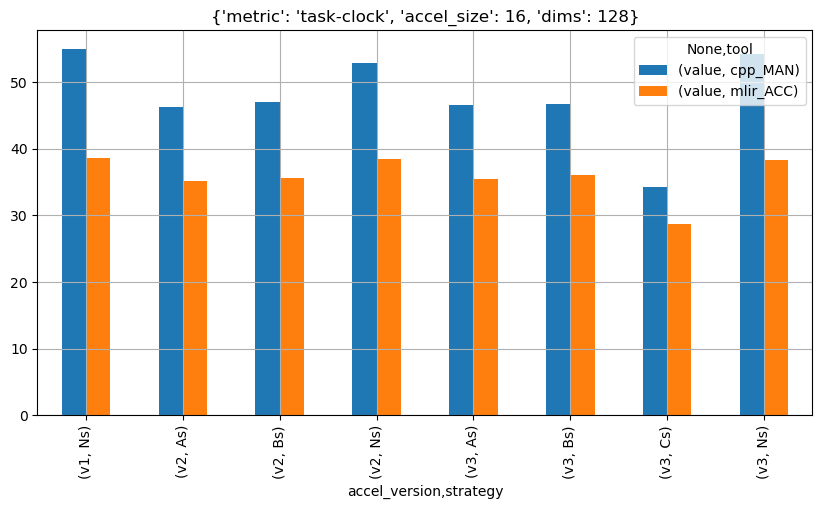

In [4]:
# filter_dict = {'metric': 'task-clock',
#                 'accel_version': 'v3',
#                 'dims': 128}
# filter_dict = {'metric': 'task-clock',
#                 'strategy': 'Ns',
#                 'dims': 128}
filter_dict = {}
filter_dict['metric'] = 'task-clock'
# filter_dict['metric'] = 'cache-references'
# filter_dict['metric'] = 'branch-instructions'
# filter_dict['metric'] = 'page-faults'

# filter_dict['strategy'] = 'Ns'
filter_dict['accel_size'] = 16

# filter_dict['accel_version'] = 'v3'
filter_dict['dims'] = 128

filtered_df = filter_df(df, filter_dict)

to_plot = ['value']
# pv_columns = ['strategy', 'tool']
pv_columns = ['tool']
# make pv_index the remaining column names not in pv_columns and to_plot
pv_index = [x for x in all_columns if x not in pv_columns + to_plot]

print('pv_index:\t{}'.format(pv_index))
print('pv_columns:\t{}'.format(pv_columns))
print('to_plot:\t{}'.format(to_plot))

# make a pivot table
df_pivot = filtered_df.pivot_table(
    index=pv_index, columns=pv_columns, values=to_plot)
print('len of df_pivot: {}'.format(len(df_pivot)))

df_dropped = df_pivot
# Check if len of uniques in a index is 1 and drop it if it is
for col in df_dropped.index.names:
    if len(df_dropped.index.get_level_values(col).unique()) == 1:
        # print with specic number of characters for first value
        print('dropping {:<15} unique value is: {} '.format(
            col, df_dropped.index.get_level_values(col).unique()))
        df_dropped = df_dropped.droplevel(col)

# save as df_to_plot
df_to_plot = df_dropped

# plotting with pandas
# with pattern on the legend
ax = df_to_plot.plot(kind='bar', figsize=(10, 5))
# add grid
ax.grid()
plt.title(filter_dict)
plt.show()


# Working with normalized data

In [5]:
# pivot metric values into columns
df_p = df.pivot(index=['problem_size', 'dims', 'kernel', 'tool', 'accel_size',
                'accel_version', 'strategy', 'threads', 'board'], columns='metric', values='value')
df_p = df_p.reset_index()
df_p.head()


metric,problem_size,dims,kernel,tool,accel_size,accel_version,strategy,threads,board,L1-dcache-load-misses,...,L1-icache-load-misses,branch-instructions,branch-misses,cache-misses,cache-references,context-switches,cpu-cycles,duration_time,page-faults,task-clock
0,128_128_128,128,matmul_i32,cpp_MAN,4,v1,Ns,1,tul_rel,437581.0,...,54145.0,8518235.0,963147.0,447391.0,46208423.0,2.0,219635663.0,340264483.0,158.0,339.00
1,128_128_128,128,matmul_i32,cpp_MAN,4,v2,As,1,tul_rel,153336.0,...,51095.0,7601649.0,913149.0,160271.0,38603380.0,1.0,196585680.0,304486445.0,159.0,303.37
2,128_128_128,128,matmul_i32,cpp_MAN,4,v2,Bs,1,tul_rel,418864.0,...,53386.0,7598637.0,936925.0,420844.0,38738709.0,1.0,202720007.0,313988035.0,159.0,312.85
3,128_128_128,128,matmul_i32,cpp_MAN,4,v2,Ns,1,tul_rel,442490.0,...,51779.0,8404474.0,1237904.0,447111.0,46556677.0,2.0,224621754.0,348017983.0,159.0,346.65
4,128_128_128,128,matmul_i32,cpp_MAN,4,v3,As,1,tul_rel,152040.0,...,91462.0,7465580.0,953393.0,153164.0,38634921.0,2.0,197253760.0,305665084.0,158.0,304.46


In [6]:
# Prepare for normalization
df_p = df.pivot(index=['problem_size', 'dims', 'kernel', 'tool', 'accel_size',
                'accel_version', 'strategy', 'threads', 'board'], columns='metric', values='value')
df_p = df_p.reset_index()

# Normalize all values based on row mlir_CPU, accel_size=0, accel_version=NONE, strategy=NONE, dims=<dims_value>
# columns to normalize: c
c = df['metric'].unique()

for d in df_p['dims'].unique():
    cpu_loc = (df_p['tool'] == 'mlir_CPU') & (df_p['dims'] == d)
    acc_loc = (df_p['tool'] == 'mlir_ACC') & (df_p['dims'] == d)
    man_loc = (df_p['tool'] == 'cpp_MAN') & (df_p['dims'] == d)

    # assert count of True values in cpu_loc is 1
    assert sum(cpu_loc) == 1

    # Normalize accelerator values by CPU values, then normalize CPU values by CPU values
    df_p.loc[acc_loc, c] = df_p.loc[acc_loc, c].apply(
        lambda x: x / df_p.loc[cpu_loc, c].values[0], axis=1)
    df_p.loc[man_loc, c] = df_p.loc[man_loc, c].apply(
        lambda x: x / df_p.loc[cpu_loc, c].values[0], axis=1)
    df_p.loc[cpu_loc, c] = df_p.loc[cpu_loc, c].apply(
        lambda x: x / df_p.loc[cpu_loc, c].values[0], axis=1)

df_n = df_p
df_n.head()


metric,problem_size,dims,kernel,tool,accel_size,accel_version,strategy,threads,board,L1-dcache-load-misses,...,L1-icache-load-misses,branch-instructions,branch-misses,cache-misses,cache-references,context-switches,cpu-cycles,duration_time,page-faults,task-clock
0,128_128_128,128,matmul_i32,cpp_MAN,4,v1,Ns,1,tul_rel,0.268587,...,1.659159,1.784800,5.204653,0.281162,1.120890,2.0,2.041182,2.035290,1.012821,2.041185
1,128_128_128,128,matmul_i32,cpp_MAN,4,v2,As,1,tul_rel,0.094117,...,1.565698,1.592751,4.934474,0.100722,0.936412,1.0,1.826967,1.821284,1.019231,1.826650
2,128_128_128,128,matmul_i32,cpp_MAN,4,v2,Bs,1,tul_rel,0.257098,...,1.635901,1.592119,5.062954,0.264479,0.939695,1.0,1.883977,1.878117,1.019231,1.883731
3,128_128_128,128,matmul_i32,cpp_MAN,4,v2,Ns,1,tul_rel,0.271600,...,1.586658,1.760964,6.689384,0.280986,1.129337,2.0,2.087521,2.081667,1.019231,2.087247
4,128_128_128,128,matmul_i32,cpp_MAN,4,v3,As,1,tul_rel,0.093322,...,2.802660,1.564240,5.151944,0.096256,0.937177,2.0,1.833176,1.828334,1.012821,1.833213


In [7]:
df_dropped = df_n

keep_c = ['problem_size', 'dims', 'kernel', 'tool', 'accel_size',
          'accel_version', 'strategy', 'threads', 'board']
keep_cm = c

drop_c = ['problem_size', 'kernel', 'threads', 'board']
drop_cm = ['L1-icache-load-misses', 'duration_time', 'context-switches']
keep_c = [x for x in keep_c if x not in drop_c]
keep_cm = [x for x in keep_cm if x not in drop_cm]

print(keep_c)
print(keep_cm)

# First drop values that are not relevant:
df_dropped = df_dropped.drop(columns=drop_c, inplace=False)
df_dropped = df_dropped.drop(columns=drop_cm, inplace=False)

# Some filters
df_dropped = df_dropped[df_dropped['dims'] >= 64]

# Transform values under c columns into two columns: metric and value
df_dropped = df_dropped.melt(
    id_vars=keep_c, value_vars=keep_cm, var_name='metric', value_name='value')


# # Filter! TODO: Deleteme
# df_dropped = df_dropped[df_dropped['strategy'] == 'Ns']

df_dropped.head()
print(df_dropped.shape)


['dims', 'tool', 'accel_size', 'accel_version', 'strategy']
['branch-instructions', 'branch-misses', 'cache-references', 'cache-misses', 'cpu-cycles', 'page-faults', 'task-clock', 'L1-dcache-load-misses', 'L1-dcache-loads', 'L1-dcache-stores']
(1470, 7)


In [8]:
df_dropped.head()


,dims,tool,accel_size,accel_version,strategy,metric,value
0,128,cpp_MAN,4,v1,Ns,branch-instructions,1.784800
1,128,cpp_MAN,4,v2,As,branch-instructions,1.592751
2,128,cpp_MAN,4,v2,Bs,branch-instructions,1.592119
3,128,cpp_MAN,4,v2,Ns,branch-instructions,1.760964
4,128,cpp_MAN,4,v3,As,branch-instructions,1.564240


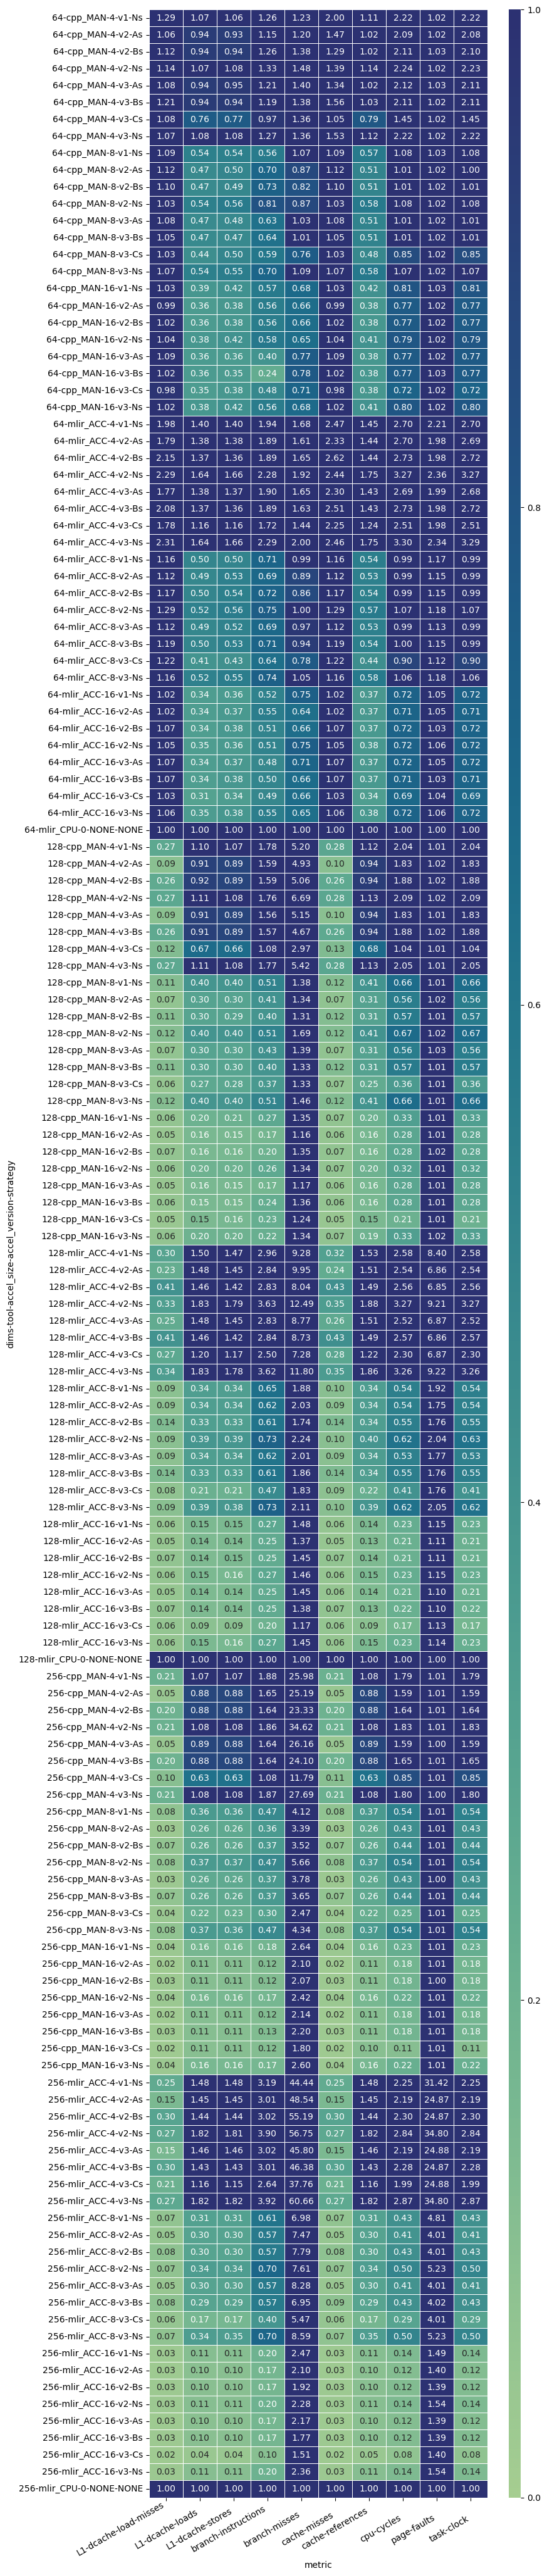

In [9]:
# use seaborn to plot the heatmap of the normalized values presented in columns c
yv = 1250
xv = 6
ys, xs = df_dropped.shape
# fix legend
legend_cfg = {}
# legend_cfg["shrink"] = 0.2 # default is 0.2
legend_cfg["aspect"] = 175*ys/yv  # default is 20
# legend_cfg["fraction"] = 1 # default is 0.2

df_pivot = df_dropped.pivot(index=keep_c, columns='metric', values='value')
plt.figure(figsize=(8*xs/xv, 35*ys/yv))
ax = sns.heatmap(df_pivot,
                 linewidth=.5, annot=True, fmt='.2f',
                 vmin=0, vmax=1,
                 cmap="crest",
                 cbar_kws=legend_cfg
                 )
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
# rotate xticks
plt.xticks(rotation=30, va='center', ha='right', position=(0, -0.012*yv/ys))
# tight layout
plt.tight_layout()
